#2023.01.05

#머신러닝

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split #train set / test set 나눠서 작동
from sklearn.model_selection import cross_val_score # cross_val_score : 교차검증 함수
from sklearn.neighbors import KNeighborsRegressor # KNeighborsRegressor : 최근접 이웃 회귀

In [ ]:
df = pd.read_csv("/content/Ashopping (1).csv", encoding = "cp949" )
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [ ]:
#필요 열(변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "1회 평균매출액", "할인권 사용 횟수"]]  #feature = 특성, 독립변수
Y = df["평균 구매주기"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#model 만들기
model = KNeighborsRegressor()

#교차검증(높으면 좋음)
score = cross_val_score(model, X_train, Y_train, cv = 10)
print("교차검증 점수:", score)

교차검증 점수: [0.71641358 0.55975791 0.76634495 0.58696302 0.60491788 0.64888287
 0.73366212 0.53759107 0.74664738 0.79547413]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import StratifiedKFold

#소규모/필요열(변수,feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "거래기간" , "방문빈도"]]
Y = df["이탈여부"]

#데이터 분할(train set, test set)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.3 , random_state=0) #1에서 train 과 test를 7:3 나눈것 test_size 0.3

#model 만들기
model = KNeighborsClassifier() #분류모형 (y만 결정되면 회귀인지 분류인지 알 수 있음. 이탈여부이기 때문에 분류.)

#검증(Stratifield K-fold Cross-Validation test)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0) #회귀는 cv에 넣고, 분류는 n_splits에 넣기기
scores = cross_val_score(model , X_train, Y_train, cv = skf)
print("교차검증 점수:" , scores)

교차검증 점수: [0.64285714 0.7        0.67857143 0.67142857 0.70714286]


In [ ]:
from sklearn.model_selection import GridSearchCV

#필요 열(변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "1회 평균매출액", "할인권 사용 횟수"]]
Y = df["이탈여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#모험생성
model = KNeighborsClassifier()

#그리드 인자 검색
mylist = list(range(1,50))
k_list = [x for x in mylist if x%2 !=0]
parameter_grid = {"n_neighbors" : k_list}

#그리드 서치
grid_search = GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

#grid_search.best_params_

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49]})

In [ ]:
#그리드 서치 
grid_search = GridSearchCV(model, parameter_grid, cv = 5)
grid_search.fit(X_train, Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00538783, 0.0139792 , 0.01208749, 0.0134583 , 0.00948009,
        0.00725827, 0.00366049, 0.00625567, 0.0047565 , 0.01025057,
        0.01175313, 0.0089386 , 0.00811119, 0.00852361, 0.00930114,
        0.00407543, 0.00369864, 0.01199656, 0.00665598, 0.01064239,
        0.00962758, 0.00950251, 0.01044664, 0.00889063, 0.0112175 ]),
 'std_fit_time': array([0.00297472, 0.00947809, 0.00351806, 0.001917  , 0.00764571,
        0.00671076, 0.00012118, 0.00238925, 0.00230936, 0.0048109 ,
        0.0075756 , 0.00349001, 0.00536334, 0.00635159, 0.00478887,
        0.00049065, 0.00015428, 0.00588017, 0.00375123, 0.00394246,
        0.00294822, 0.00568978, 0.00557646, 0.00432681, 0.00507885]),
 'mean_score_time': array([0.02590175, 0.04809318, 0.03180251, 0.03665242, 0.02238903,
        0.01994076, 0.01100049, 0.01682558, 0.01352057, 0.02798395,
        0.02546883, 0.01946344, 0.02741494, 0.01664085, 0.02199874,
        0.01589346, 0.01706967, 0.04393253, 0.01665215, 0.03

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=31)

In [ ]:
from sklearn.metrics import accuracy_score
be = grid_search.best_estimator_
pred = be.predict(X_test)
accuracy_score(Y_test,pred)

0.75

#변수 선택

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
#SelectKBest : 카이제곱값으로 베스트 뽑아줌

#데이터 지정(변수)
X = df.drop(["고객ID", "이탈여부"],axis = 1)
Y = df["이탈여부"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#일변량 통계기반
selector = SelectKBest()
selector.fit(X_train,Y_train)

score = pd.DataFrame()
score["Chi2"] =  selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"]==True]

#이탈여부(ㅛ에 대해 영향을 준다는 것을 알 수 있다.
#회귀분석에서 X로 반영 가능

,Chi2,p-value,support,attribute
0,11.220487,8.525018e-04,True,총매출액
1,21.391230,4.462997e-06,True,구매금액대
2,40.530259,3.508018e-10,True,방문빈도
3,31.867994,2.401115e-08,True,1회 평균매출액
8,6.784768,9.389630e-03,True,클레임접수여부
11,12.171897,5.156069e-04,True,성별
13,60.680197,2.435210e-14,True,거래기간
14,86.354376,1.882930e-19,True,할인민감여부
16,6.449529,1.131399e-02,True,Frequency
18,40.217271,4.081567e-10,True,평균 구매주기


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state=0),threshold="median")
selector. fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"]==True]

#앙상블 : 다양한 모양들을 모아서 분석하는 것
#median : 중간 값을 개선해 나가는 것
#threshold의 의미는 분류기준, 새롭게 들어온 데이터를 보고 모델이 얼마나 엄격하게 1로 결정할지의 기준

,attribute,support
0,총매출액,True
2,방문빈도,True
3,1회 평균매출액,True
4,할인권 사용 횟수,True
5,총 할인 금액,True
10,거주지역,True
12,고객 나이대,True
13,거래기간,True
14,할인민감여부,True
18,평균 구매주기,True


#데이터 밸런싱
오버샘플링, 언더샘플링

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [ ]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("uner train data %s" % Counter(Y_train_under))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
uner train data Counter({0: 219, 1: 219})


In [ ]:
#오버 샘플링
from imblearn.over_sampling import SMOTE #synthetic minority over-sampling techniqe

X_train_over, Y_train_over = SMOTE(random_state= 0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("over train data %s" % Counter(Y_train_over))

#synthetic 인조 

#0 -> 이탈안함 / 1 -> 이탈함

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
over train data Counter({1: 481, 0: 481})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

#선형 회귀분석

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df["평균 구매주기"].describe()

count    1000.000000
mean      266.880824
std       254.077398
min        13.980645
25%       111.957671
50%       191.469697
75%       324.386218
max      1956.000000
Name: 평균 구매주기, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0,

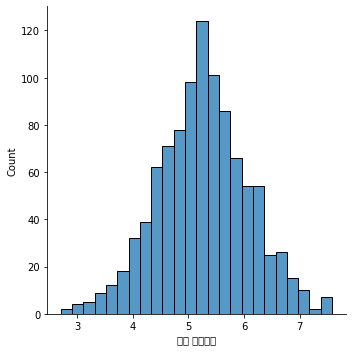

In [ ]:
df["평균 구매주기"] = np.log1p(df["평균 구매주기"])
sns.displot(df["평균 구매주기"])

#로그 : 정규화 시켜주는 과정

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num = ['총매출액', '1회 평균매출액', '할인권 사용 횟수','총 할인 금액', '구매카테고리수', 'Frequency','Monetary']
cg = ['구매금액대', '고객등급', '구매유형', '클레임접수여부', '거주지역', '성별', '고객 나이대']

X = df[df.이탈여부 ==0][num+cg]
Y = df[df.이탈여부 == 0]["평균 구매주기"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling' , StandardScaler() , num) , ('onehot' , OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.42215576 -0.59782402  0.72324173  0.52150413  1.67181667 -0.24075719
  0.52402175  1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.        ]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

Ir = LinearRegression().fit(X_train, Y_train)

Y_pred = Ir.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}". format(Ir.score(X_train, Y_train)))
print("testR2 : {:.3f}".format(Ir.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse)) #RMSE가 0에 가까울수록 좋음

predict value
 [ 0.24316028  0.26118365  0.11142313  0.41991698  0.10759381  0.23922611
  0.26257742  0.2072948   0.43310731  0.18174763  0.63019116  0.30304085
  0.24740564  0.54278432 -0.00527551  0.3402226   0.41492831  0.4058005
  0.46254816  0.55803768  0.22655829  0.29474303  0.27469475  0.42882345
  0.22766943  0.55910507  0.42378023  0.40680943  0.31251304  0.33558426
  0.33280047  0.33542074  0.4273931   0.0288778   0.22840567  0.2364713
  0.18417972  0.2270927   0.14084518  0.26569394  0.25043649  0.3609664
  0.22437197  0.1158634   0.34500475  0.39810422  0.3903227   0.50995136
  0.36154697  0.36916151  0.28382853  0.40948448  0.50106205  0.22050701
  0.18540196  0.39700262  0.27280793  0.34267038  0.06491991  0.0573909
  0.45330671  0.36983107  0.23927545  0.40312799  0.26814009  0.3911057
  0.39113853  0.25231798  0.49547998  0.21799421  0.14672978  0.30152271
  0.3256266   0.49749167  0.28943829  0.22618915  0.14510587  0.40648951
  0.22406843  0.42093956  0.41627455  0.3

In [ ]:
#num = ['총매출액', '1회 평균매출액', '할인권 사용 횟수','총 할인 금액', '구매카테고리수', 'Frequency','Monetary']
#cg = ['구매금액대', '고객등급', '구매유형', '클레임접수여부', '거주지역', '성별', '고객 나이대']
#num : x가 새로 생기지는 않음
#cg : x가 집단만큼 생김 맞냐 이게.. 
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

NameError: ignored

#릿지, 라쏘 회귀

In [ ]:
#릿지

from sklearn.linear_model import Ridge

Ir_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
Y_pred = Ir_ridge.predict(X_test)

print("예측값(Y predict value) \n", Y_pred)

#릿지를 적용해서 나온 예측값

예측값(Y predict value) 
 [6.03000797 5.41671746 5.42932123 6.44127922 4.93860553 5.85932374
 4.56839084 3.81054588 5.22477967 5.61889847 5.66813628 3.42981349
 4.33248596 5.41101642 5.83804147 5.04471767 5.1211324  5.61206657
 5.28801914 5.32488795 5.45169079 5.25880606 5.71346032 5.02859175
 4.70951147 5.38878901 5.60027856 4.09721037 4.40744067 5.45098959
 5.39702921 5.64784758 5.27252093 5.79008128 5.35467632 5.56063965
 5.19607603 5.57536879 5.46592343 6.61557262 5.42387534 4.43825559
 4.69193156 4.30121093 4.7731486  5.950302   4.94125475 5.44030949
 5.2948706  5.79698793 5.44723488 6.13538058 4.70865764 4.72464693
 5.25715635 5.29808444 4.9962477  5.70904828 4.24165264 5.06579461
 5.1252699  4.83996783 4.44518243 5.55905844 4.70841625 5.47720406
 5.44152413 4.79120395 5.56974829 3.25280314 5.6106784  5.06803014
 5.25956393 4.70791967 3.98838094 5.84965084 5.67331254 5.31944294
 4.21646513 4.98002289 4.81229781 5.46333154 5.27177929 4.610552
 5.48261262 5.17186083 4.9841382  5.52892

In [ ]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ridgeR2 : {:.3f}".format(Ir_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("Ir R2 : {:.3f}".format(Ir.score(X_train, Y_train)))
print("ridge R2 : {:.3f}".format(Ir_ridge.score(X_train,Y_train)))

ridgeR2 : 0.726
RMSE : 0.403
Ir R2 : 0.726
ridge R2 : 0.726


In [ ]:
#라쏘
from sklearn.linear_model import Lasso

Ir_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
Y_pred = Ir_lasso.predict(X_test)

print("예측값(Y predict value) \n", Y_pred)

#알파값에 의해 베타 계수들이 규제를 받음

예측값(Y predict value) 
 [5.85999035 5.43036643 5.44663007 6.48906612 4.97641413 5.69822258
 4.5716117  3.88906492 5.27984535 5.54858587 5.67709958 3.30742434
 4.45272397 5.42149034 5.87903236 5.00187799 5.12055037 5.56949787
 5.33279402 5.0264179  5.52733519 5.1867408  5.665303   5.0119166
 4.70132881 5.44864394 5.62488274 4.16327321 4.38211259 5.4308754
 5.37511549 5.67040693 5.19104603 5.79672221 5.47877539 5.4547485
 5.25369206 5.54714363 5.42273349 6.6026743  5.44052754 4.61359453
 4.74827815 4.47000201 4.78926599 5.82570411 4.93589832 5.42347938
 5.19064772 5.71009563 5.38598782 5.87895508 4.47556196 4.77561637
 5.23514088 5.36821002 4.94726191 5.74052715 4.48801399 4.99109917
 4.96578984 4.92437103 4.49896869 5.51596171 4.70911385 5.37807152
 5.38059893 4.70777152 5.63186935 3.33411699 5.63024419 5.02637709
 5.23878352 4.85617924 4.07737633 5.82495727 5.67069263 5.22957699
 4.31245514 5.15236296 4.79517679 5.3733623  5.32829571 4.50502391
 5.54652945 5.21846617 5.01779632 5.539628

In [ ]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("lasso R2 : {:.3f}".format(Ir_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("Ir R2 : {:.3f}". format(Ir.score(X_train, Y_train)))
print("ridge R2 :{:.3f}".format(Ir_ridge.score(X_train,Y_train)))

#선에 의해 설명되는 데이터 값은 줄어들었지만 예측면에서는 좋은 결과
#알제곱은 떨어졌지만 rsme값은 더 작음(에러가 적음) = 라쏘가 예측력이 더 좋다
#라쏘가 일반적으로는 성능이 떨어지지만 데이터가 많은 경우(변수가 많은 경우)는 라쏘가 더 효과적이다
#절충된 모델은 엘라스틱넷이 있음

lasso R2 : 0.709
RMSE : 0.391
Ir R2 : 0.726
ridge R2 :0.726


In [ ]:
#엘라스틱넷
from sklearn.linear_model import ElasticNet

Ir_ela = ElasticNet(alpha = 0.01).fit(X_train, Y_train)
Y_pred = Ir_ela.predict(X_test)

print("예측값(Y predict value) \n", Y_pred)

예측값(Y predict value) 
 [5.9405265  5.43949734 5.45645319 6.46077287 4.95641647 5.75737516
 4.58077628 3.8664991  5.2544911  5.56797779 5.69465169 3.35014751
 4.41740921 5.41472514 5.87198794 5.01984866 5.1079496  5.56938294
 5.33424602 5.01150019 5.50236848 5.21289944 5.70405138 5.00509779
 4.73712733 5.43318095 5.63394533 4.16143035 4.40905906 5.45448006
 5.38029119 5.65239382 5.22517748 5.78702872 5.43971899 5.50091954
 5.24686551 5.54584606 5.45012419 6.63427603 5.44729928 4.5642916
 4.7153638  4.40426435 4.79804451 5.87250388 4.95774286 5.42138422
 5.21745366 5.74415372 5.42050245 5.98513427 4.55881782 4.75746308
 5.24959713 5.33108418 4.9783863  5.741972   4.39245511 5.01488932
 5.01745308 4.88230883 4.47336366 5.52395419 4.69688542 5.41272695
 5.3969981  4.7412395  5.62539593 3.29112611 5.63602937 5.02901435
 5.25500609 4.80177521 4.03300414 5.85055833 5.6889433  5.2796506
 4.26043501 5.08768705 4.80884726 5.39430314 5.33776004 4.52387454
 5.51513909 5.19015221 4.99602694 5.54968

In [ ]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("ela R2 : {:.3f}".format(Ir_ela.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("Ir R2 : {:.3f}". format(Ir.score(X_train, Y_train)))
print("ridge R2 :{:.3f}".format(Ir_ridge.score(X_train,Y_train)))
print("lasso R2 :{:.3f}".format(Ir_lasso.score(X_train,Y_train)))

#예측력,오차가 릿지와 라쏘 중간에서 잘 절충됨

ela R2 : 0.717
RMSE : 0.394
Ir R2 : 0.726
ridge R2 :0.726
lasso R2 :0.709


In [ ]:
#선형회귀 = 종속변수가 연속형일 때 쓴다

#선형회귀분석 끝!!!!

#로지스틱회귀(Y가 범주형일 때)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,5.260784
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,0.812845
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,2.706759
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,4.727013
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,5.259938
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,5.785012
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,7.579168


In [ ]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
X = df[["총매출액","거래기간","방문빈도"]]
Y = df["이탈여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

#오버 샘플링
smote = SMOTE(random_state=0)
X_train_over, Y_train_over = smote.fit_resample(X_train,Y_train)

[[ 0.69336175  0.22690456  0.03475125]
 [-0.225208   -0.02778804 -0.17540748]
 [-0.52055725  0.61729402  0.98046554]
 ...
 [-0.60960507  0.55779616 -0.01778844]
 [-0.02842033 -0.64468689 -0.22794717]
 [-0.30394592  0.83127755 -0.70080431]]


In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train_over, Y_train_over)
Y_pred = logit.predict(X_test)

#Y_pred
print("accuracy : {:.3f}".format(logit.score(X_train_over, Y_train_over)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)


#C값 강도에 따라 변수의 가중치 조정
#너무 높거나 작으면 모델이 최적화가 안됨
#보통 1 넣으면 된다
#회귀 모양이라 결정게수 나옴, 어큐리시랑 에프원 스코어로 평가하기
#에프원 스코어 식 피디엪에 있다
#coef는 계수
#-0.10121145 베타제로

#종속변수가 0과 1인 애들만 할 수 있나?
#다항로지스틱회귀분석 = 종속변수가 0,1이 아니라 2345처럼 다항으로 이루어져 있음

#위쪽 accuracy는 train(모델)에 대한 얘기
#밑에는 예측결과
#더해서 


accuracy : 0.710
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       219
           1       0.47      0.81      0.60        81

    accuracy                           0.70       300
   macro avg       0.69      0.74      0.68       300
weighted avg       0.79      0.70      0.72       300

[-0.10121145]
[[-0.10720418 -0.58431042 -0.47899592]]


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

#다항로지스틱회귀분석

In [ ]:
X = df[["방문빈도","총 할인 금액","거래기간","할인민감여부"]]
Y = df["구매금액대"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0) #데이터를 트레인 값이랑 테스트 값(7:3)으로 나누는 작업

#Column transform
ct = ColumnTransformer([("scaling",StandardScaler(),["방문빈도","총 할인 금액","거래기간"]), #스케일링: 숫자. 원핫인코딩:범주
                        ("onehot",OneHotEncoder(sparse=False),["할인민감여부"])])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

#model
multilogit = LogisticRegression(random_state=0, solver='newton-cg',multi_class="multinomial") #함수식 y=f(x)어쩌구
#slover:"lbfgs", "liblinear","sag","saga"
multilogit.fit(X_train,Y_train)
Y_pred=multilogit.predict(X_test) 

#성능
print("r2:{:.3f}".format(multilogit.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))


#그래서 먼데 이게...

r2:0.603
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       154
           1       0.28      0.09      0.13        82
           2       0.67      0.58      0.62        64

    accuracy                           0.59       300
   macro avg       0.52      0.51      0.49       300
weighted avg       0.53      0.59      0.54       300



#K-NN(K-최근접 이웃)

In [ ]:
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,5.011544
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,4.410883
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,7.505492
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,6.001690
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,5.896604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,4.884748
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,6.648553
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,5.875579
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,4.938321


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
#classification

X = df[["총매출액", "1회 평균매출액", "방문빈도", "거래기간", "평균 구매주기"]]
Y = df["이탈여부"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler = StandardScaler(). fit(X_train, Y_train)
X_test = scaler. transform(X_test)
X_train = scaler. transform(X_train)

X_train, Y_train = SMOTE(random_state=0). fit_resample(X_train, Y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")

knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_pred, Y_test))

accuracy : 0.844
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       183
           1       0.81      0.56      0.67       117

    accuracy                           0.78       300
   macro avg       0.79      0.74      0.75       300
weighted avg       0.79      0.78      0.77       300



In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
#numeric value(Y)

import numpy as np

X = df[df.이탈여부==0][['총매출액','1회 평균매출액','총 할인 금액','구매카테고리수','Frequency']]
Y = df[df.이탈여부==0]["평균 구매주기"]
Y = np.log1p(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler = StandardScaler(). fit(X_train, Y_train)
X_test = scaler. transform(X_test)
X_train = scaler. transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9, p=2)  #knn에서 뽑아서 리그레스 적용
#p : int, default = 2
#Power parameter for the Minkowski metric,When p=1
#this is equivalent to using manhatan_distance(l1), and euclidean_distance(l2) for p = 2. For arbitrary p. minkowski_distance

knn_reg.fit(X_train, Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy : {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:{:.3f}".format(rmse))

#RMSE 여기선주기에 대한 오차


accuracy : 0.759
RMSE:0.063


#의사결정나무(Decision Tree)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,5.260784
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,0.812845
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,2.706759
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,4.727013
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,5.259938
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,5.785012
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,7.579168


In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
X = df[['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', 
        '구매카테고리수', '성별', '거주지역']]
Y = df["이탈여부"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)
Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.626
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       219
           1       0.28      0.28      0.28        81

    accuracy                           0.61       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.61      0.61      0.61       300



In [ ]:
feature_name = X.columns
feature_importance =DT_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True)

#변수 중요도 : 수치가 높울수록 그 모형에서 중요한 변수

[(0.7493404125777997, '총매출액'),
 (0.1630541216629677, '거주지역'),
 (0.08760546575923255, '구매카테고리수'),
 (0.0, '할인권 사용 횟수'),
 (0.0, '총 할인 금액'),
 (0.0, '성별'),
 (0.0, '구매유형'),
 (0.0, '구매금액대')]

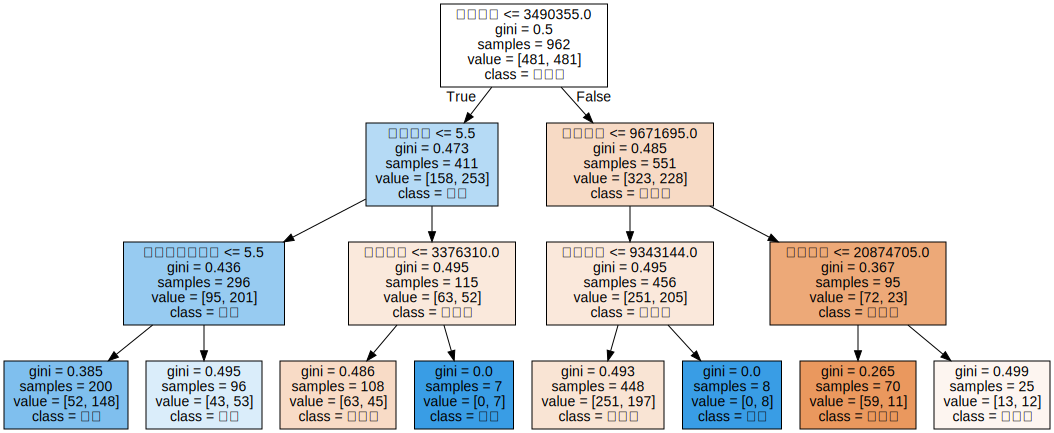

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model, out_file="tree.dot", class_names=["비이탈","이탈"],
                feature_names = feature_name, impurity=True, filled = True)


#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


In [ ]:
#numeric value(Y) => Y가 연속형일 때
X = df[df.이탈여부==0][["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y = df[df.이탈여부==0]["평균 구매주기"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state=0, max_depth = 5)
DT_model_reg.fit(X_train, Y_train)
Y_pred =DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))

#위에는 모델
#밑에는 예측에 대한 얘기

#회귀에는 rmse보기

#분류모형에서는 f1스코어 accuracy 보기

accuracy : 0.558
rmse : 0.625


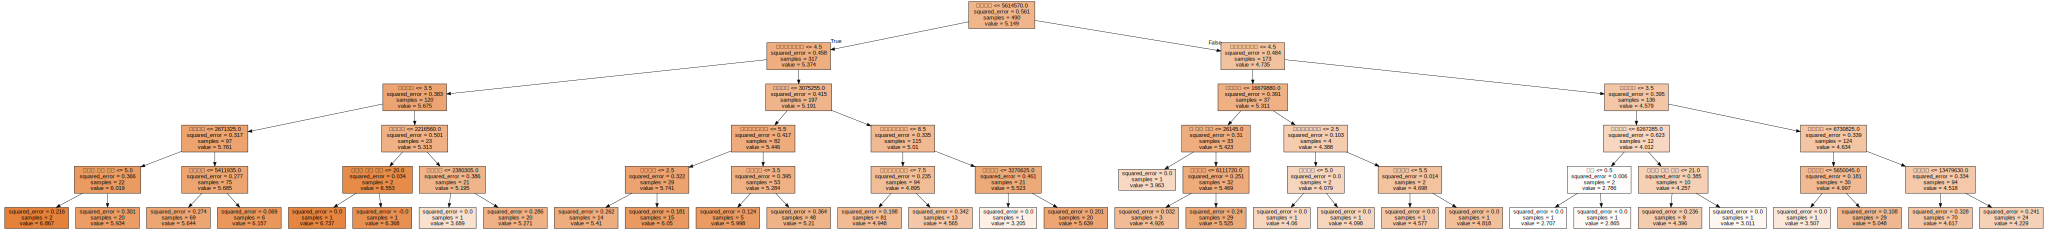

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg, out_file="tree.dot", class_names=["비이탈","이탈"],
                feature_names = feature_name, impurity=True, filled = True)


#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


#SVM : Support Vector Machine

In [ ]:
X = df[['총매출액', '구매금액대', '할인권 사용 횟수']]
Y = df["이탈여부"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.svm import SVC 

SVC_model = SVC(C=1, gamma=1, random_state=0)
SVC_model.fit(X_train, Y_train)
Y_pred =SVC_model.predict(X_test)
print("accuracy : {:.3f}".format(SVC_model.score(X_train,Y_train)))
print(classification_report(Y_test,Y_pred))

#accuracy 값 : 1 =>  과적합 모델
#C값 :이상치들을 포기하느냐 마느냐 / 낮게 만들면 이상치 포기, 높게 잡으면 이상치 포함 
#gamma : 첨도 같은 것 / 감마가 커지면 데이터에 가깝고 뾰족하게 분류 , 적절한 값은 데이터의 성능을 보고 판단

accuracy : 1.000
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       219
           1       0.00      0.00      0.00        81

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X = df[['구매금액대','할인권 사용 횟수']]
Y = np.log1p(df["1회 평균매출액"])

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

scaler = StandardScaler().fit(X_train,Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model = SVR(C=1, kernel = "linear", epsilon = 0.1)
SVR_model.fit(X_train, Y_train)
Y_pred =SVR_model.predict(X_test)
print("accuracy : {:.3f}".format(SVR_model.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))
print(SVR_model.coef_)

accuracy : 0.089
RMSE : 0.698
[[0.20019801 0.04629322]]


#나이브 베이즈(Naive Bayes)

In [ ]:
X = df[["총매출액","구매금액대","할인권 사용 횟수"]]
Y = df["할인민감여부"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB(var_smoothing = 0) 
NB_model.fit(X_train, Y_train)
Y_pred =NB_model.predict(X_test)
print("accuracy : {:.3f}".format(NB_model.score(X_train,Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.661
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       177
           1       0.79      0.42      0.55       123

    accuracy                           0.72       300
   macro avg       0.74      0.67      0.67       300
weighted avg       0.73      0.72      0.69       300



In [ ]:
#numeric value(Y)

X = df[df.이탈여부==0][["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y =np.log1p(df[df.이탈여부==0]["평균 구매주기"])
#로그는 Y가 연속형일 때만 쓴다이

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import BayesianRidge

NB_model_reg = BayesianRidge(alpha_1 = 0.001,lambda_1=0.001)
NB_model_reg.fit(X_train, Y_train)
Y_pred =DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(NB_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))
print(NB_model_reg.coef_)

accuracy : 0.284
rmse : 3.367
[-5.53099958e-09 -2.22146741e-02  5.83806583e-04 -5.13836053e-08
 -5.44323948e-03 -1.72715338e-02  1.04643592e-02  1.78568992e-03]


#모형 성능비교

In [ ]:
X1 = df[["총매출액","구매금액대","할인권 사용 횟수","총 할인 금액","구매유형","구매카테고리수","성별","거주지역"]]
Y1 = df["이탈여부"]
 

In [ ]:
X.columns

Index(['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', '구매카테고리수', '성별',
       '거주지역'],
      dtype='object')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

#Column transform
ct = ColumnTransformer([("scaling",StandardScaler(),['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액']), #스케일링: 숫자. 원핫인코딩:범주
                        ("onehot",OneHotEncoder(sparse=False),['구매유형', '구매카테고리수', '성별',
       '거주지역'])])

ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

NameError: ignored

In [ ]:
logit_model = LogisticRegression(C=1, random_state=0)
Knn_model = KNeighborsClassifier(n_neighbors=9)
dt_model = DecisionTreeClassifier(random_state=0, max_depth=.3)

In [ ]:
logit_model.fit(X_train,Y_train)
knn_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=0.3, random_state=0)

In [ ]:
logit_Y_pred = logit_model.predict(X_test)
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = dt_model.predict(X_test)

In [ ]:
print("logit score :{:.3f}".format(logit_model.score(X_train, Y_train)))
print("knn score : {:.3f}".format(knn_model.score(X_train, Y_train)))
print("dt score : {:.3f}".format(dt_model.score(X_train,Y_train)))

logit score :0.697
knn score : 0.704
dt score : 0.687


In [ ]:
print(classification_report(Y_test,logit_Y_pred))
print(classification_report(Y_test, knn_Y_pred))
print(classification_report(Y_test, dt_Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       219
           1       0.65      0.16      0.26        81

    accuracy                           0.75       300
   macro avg       0.70      0.56      0.55       300
weighted avg       0.73      0.75      0.69       300

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       219
           1       0.32      0.17      0.22        81

    accuracy                           0.68       300
   macro avg       0.53      0.52      0.51       300
weighted avg       0.62      0.68      0.64       300

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       219
           1       0.00      0.00      0.00        81

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


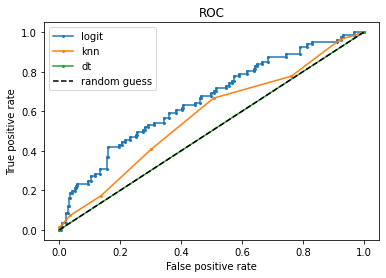

In [ ]:
#plot

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

fpr1, tpr1, threshold = roc_curve(Y_test, logit_model.decision_function(X_test))
fpr2, tpr2, threshold = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])
fpr3, tpr3, threshold = roc_curve(Y_test, dt_model.predict_proba(X_test)[:,1])
#roc_curve : fpr, tpr, threshold 세가지 값이 같이 나옴

#ROC
plt.plot(fpr1, tpr1, 'o-', ms=2, label = "logit")
plt.plot(fpr2, tpr2, 'o-', ms=2, label = "knn")
plt.plot(fpr3, tpr3, 'o-', ms=2, label = "dt")
plt.plot([0,1], [0,1], "k--", label = "random guess" )

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.show()

In [ ]:
logit_model_auc = roc_auc_score(Y_test, logit_model.decision_function(X_test))
knn_model_auc = roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:,1])
dt_model_auc = roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:,1])

In [ ]:
print("logit AUC score:{:.3f}".format(logit_model_auc))
print("knn AUC score:{:.3f}".format(knn_model_auc))
print("dt AUC score:{:.3f}".format(dt_model_auc))

logit AUC score:0.659
knn AUC score:0.572
dt AUC score:0.500
